In [3]:
%cd /home/darragh/New/DAN_CRISPR_Screen/HT

/home/darragh/New/DAN_CRISPR_Screen/HT


In [4]:
#Trimming adapters from fastqs

!ls *fastq.gz  |while read line ; do \
    bbduk.sh in1=$line out="$line".1 ktrim=r literal=GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGG -k=11; \
        bbduk.sh in1="$line".1 out="$line".2 ktrim=l literal=ACGCAACTTGTGGAAAGGACGAAACACCG -k=11 ; done
         

java -ea -Xmx6619m -Xms6619m -cp /usr/local/bin/current/ jgi.BBDuk in1=HT_DMSOrep1.fastq.gz out=HT_DMSOrep1.fastq.gz.1 ktrim=r literal=GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGG -k=11
Executing jgi.BBDuk [in1=HT_DMSOrep1.fastq.gz, out=HT_DMSOrep1.fastq.gz.1, ktrim=r, literal=GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGG, k=11]
Version 38.86

Unspecified format for output HT_DMSOrep1.fastq.gz.1; defaulting to fastq.
0.030 seconds.
Initial:
Memory: max=6941m, total=6941m, free=6920m, used=21m

Added 24 kmers; time: 	0.004 seconds.
Memory: max=6941m, total=6941m, free=6917m, used=24m

Input is being processed as unpaired
Started output streams:	0.022 seconds.
Processing time:   		21.599 seconds.

Input:                  	36154004 reads 		2714739288 bases.
KTrimmed:               	36086075 reads (99.81%) 	1063392681 bases (39.17%)
Total Removed:          	23 reads (0.00%) 	1063392681 bases (39.17%)
Result:                 	36153981 reads (100.00%) 	1651346607 bases (60.83%)

Time:                         	21

In [5]:
!ls *.2  |while read line ; do \
    seqkit seq "$line" -m 20 -M 20 > clean/"$line" ; done

/bin/bash: seqkit: command not found
/bin/bash: seqkit: command not found


In [3]:
!!ls *fastq.gz  |while read line ; do rm "$line".1 "$line".2 ;done

[]

In [ ]:
!seqkit stats *fastq.gz -j 48 >raw.stats
!seqkit stats clean/* -j 48 >trim.stats

In [ ]:
!rm *fastq.gz

In [ ]:
%cd /home/darragh/New/DAN_CRISPR_Screen/clean
!rename 's/.fastq.gz/.fastq/g' $(find . -type f)

In [8]:
! rsync 134.226.152.59:/volume1/craig/daire/DaireScreen2/brunelloLibraryRef.csv .
! rsync 134.226.152.59:/volume1/craig/daire/DaireScreen2/nonTargettingControlIds.txt .

darragh@134.226.152.59's password: 
rsync error: received SIGINT, SIGTERM, or SIGHUP (code 20) at rsync.c(644) [Receiver=3.1.3]


In [9]:
! mkdir mageckResults

In [ ]:
! cat WSU-DMSOrep1_S3_L001_R1_001.fastq WSU-DMSOrep1_S3_L002_R1_001.fastq WSU-DMSOrep1_S3_L003_R1_001.fastq WSU-DMSOrep1_S3_L004_R1_001.fastq > DMSO_R1.fastq
! cat WSU-DMSOrep2_S19_L001_R1_001.fastq WSU-DMSOrep2_S19_L002_R1_001.fastq WSU-DMSOrep2_S19_L003_R1_001.fastq WSU-DMSOrep2_S19_L004_R1_001.fastq > DMSO_R2.fastq

In [1]:
%cd /home/darragh/New/DAN_CRISPR_Screen/boxplots

/home/darragh/New/DAN_CRISPR_Screen/boxplots


In [1]:
!mageck count -l /home/darragh/New/DAN_CRISPR_Screen/brunelloLibraryRef.csv  -n DMSOvsPlasmid_mageckCounts --sample-label DMSO_1,DMSO_2,Plasmid_1,Plasmid_2 --fastq ~/New/DAN_CRISPR_Screen/craig_clean/WSU_DMSOrep1.fastq.gz ~/New/DAN_CRISPR_Screen/craig_clean/WSU_DMSOrep2.fastq.gz ~/New/DAN_CRISPR_Screen/clean/Gerry_Brunello_pDNA_R1.fastq ~/New/DAN_CRISPR_Screen/clean/Gerry_Brunello_pDNA_R2.fastq --trim-5 0 --control-sgrna /home/darragh/New/DAN_CRISPR_Screen/nonTargettingControlIds.txt

/bin/bash: mageck: command not found


In [ ]:
!mageck count -l /home/darragh/New/DAN_CRISPR_Screen/brunelloLibraryRef.csv  -n DMSOvsTAZ_mageckCounts --sample-label DMSO_1,DMSO_2,TAZ_1,TAZ_2 --fastq ~/New/DAN_CRISPR_Screen/craig_clean/WSU_DMSOrep1.fastq.gz ~/New/DAN_CRISPR_Screen/craig_clean/WSU_DMSOrep2.fastq.gz ~/New/DAN_CRISPR_Screen/craig_clean/WSU_Tazrep1.fastq.gz ~/New/DAN_CRISPR_Screen/craig_clean/WSU_Tazrep1.fastq.gz --trim-5 0 --control-sgrna /home/darragh/New/DAN_CRISPR_Screen/nonTargettingControlIds.txt

In [88]:
library(tidyr)
library(dplyr)
library(ggplot2)

options(repr.plot.width=41, repr.plot.height=9)

WT_DMSO_Plasmid_counts = read.table("/home/darragh/New/DAN_CRISPR_Screen/boxplots/WSU_DMSOvsPlasmid_mageckCounts.count_normalized.txt", sep = "\t", header=T)
WSU_DMSO_Plasmid = WT_DMSO_Plasmid_counts[(WT_DMSO_Plasmid_counts$Gene == "AEBP2") | (WT_DMSO_Plasmid_counts$Gene == "NSD1") | (WT_DMSO_Plasmid_counts$Gene == "WHSC1") , ]



WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  pivot_longer(cols = c(DMSO_1, DMSO_2, Plasmid_1, Plasmid_2),
               names_to = "Label",
               values_to = "Value") %>%
  select(sgRNA, Gene, Value, Label)



WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "DMSO_1", "DMSO", Label))

WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "DMSO_2", "DMSO", Label))

WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "Plasmid_1", "Plasmid", Label))

WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "Plasmid_2", "Plasmid", Label))


"x"
"1" ""


sgRNA,Gene,Value,Label
<chr>,<chr>,<dbl>,<fct>
sgNSD1-177211164,NSD1,256.6590,DMSO
sgNSD1-177211164,NSD1,154.4082,DMSO
sgNSD1-177211164,NSD1,277.4520,Plasmid
sgNSD1-177211164,NSD1,244.3174,Plasmid
sgWHSC1-1953388,WHSC1,994.8990,DMSO
sgWHSC1-1953388,WHSC1,544.2159,DMSO


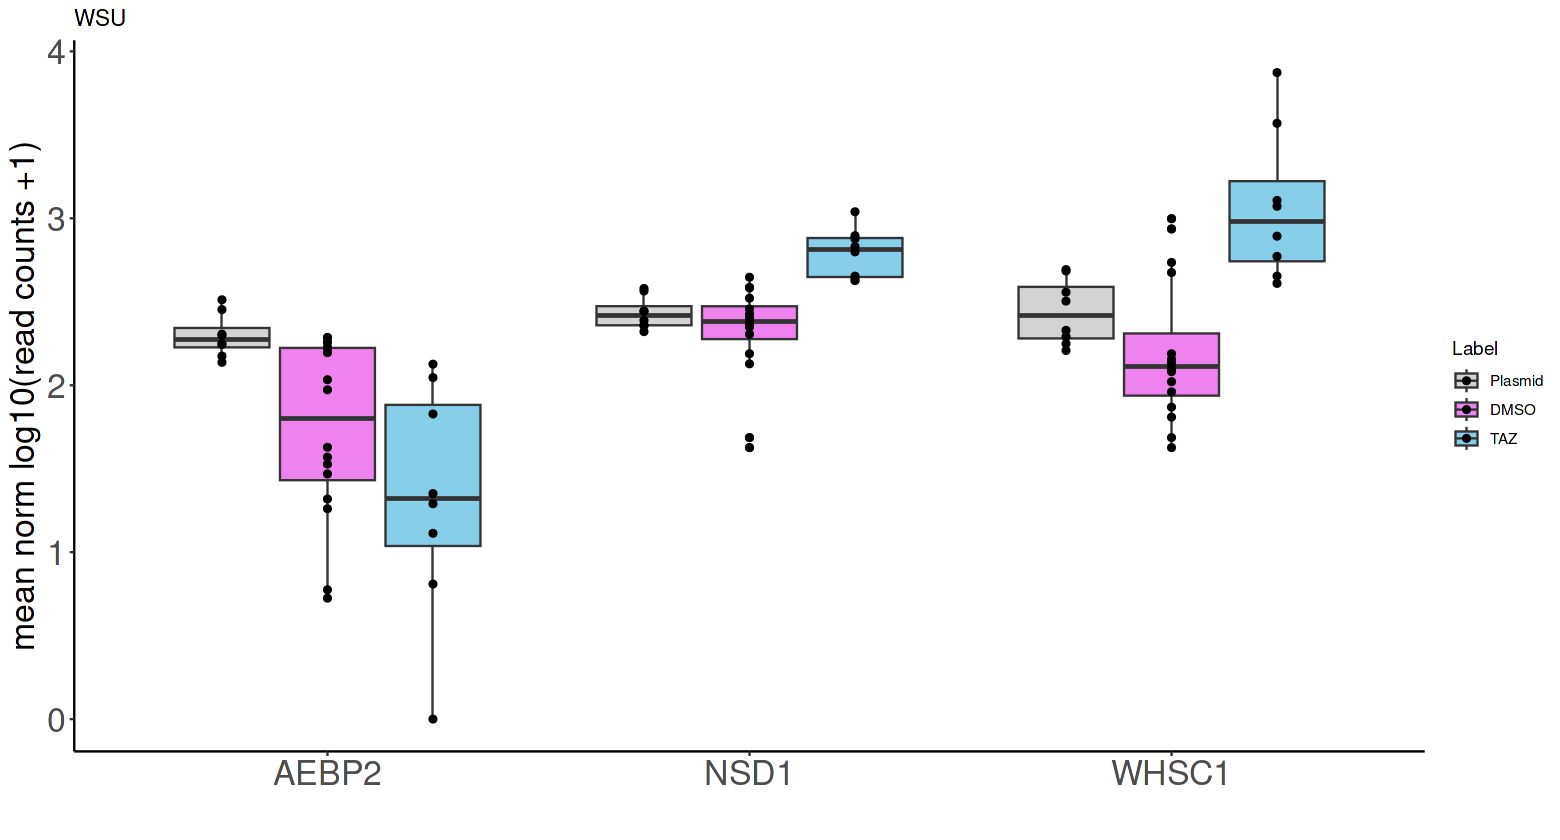

In [89]:
library(tidyr)
library(dplyr)
library(ggplot2)

options(repr.plot.width=13, repr.plot.height=7)

WT_DMSO_Plasmid_counts = read.table("/home/darragh/New/DAN_CRISPR_Screen/boxplots/WSU_DMSOvsTAZ_mageckCounts.count_normalized.txt", sep = "\t", header=T)
WSU_DMSO_TAZ = WT_DMSO_Plasmid_counts[(WT_DMSO_Plasmid_counts$Gene == "AEBP2") | (WT_DMSO_Plasmid_counts$Gene == "NSD1") | (WT_DMSO_Plasmid_counts$Gene == "WHSC1")  , ]


WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  pivot_longer(cols = c(DMSO_1, DMSO_2, TAZ_1, TAZ_2),
               names_to = "Label",
               values_to = "Value") %>%
  select(sgRNA, Gene, Value, Label)



WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "DMSO_1", "DMSO", Label))

WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "DMSO_2", "DMSO", Label))

WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "TAZ_1", "TAZ", Label))

WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "TAZ_2", "TAZ", Label))


WSU_DMSO_Plasmid_TAZ = rbind(WSU_DMSO_Plasmid, WSU_DMSO_TAZ )


# EZH2 <- EZH2 %>%
#   mutate(Label = ifelse(Label == "TAZ_1", "TAZ", Label))

# EZH2 <- EZH2 %>%
#   mutate(Label = ifelse(Label == "TAZ_2", "TAZ", Label))

WSU_DMSO_Plasmid_TAZ$Label <- factor(WSU_DMSO_Plasmid_TAZ$Label, levels = c("Plasmid", "DMSO", "TAZ"))

WSU_DMSO_Plasmid_TAZ$Value = WSU_DMSO_Plasmid_TAZ$Value+1


ggplot(WSU_DMSO_Plasmid_TAZ, aes(x = Gene, y = log10(Value), fill = Label)) +
    geom_boxplot() +
    geom_jitter(position = position_dodge(width = 0.75), size = 1.5
    ) +
  theme_classic() + 
  ylab("mean norm log10(read counts +1)") +
  xlab("") +
  ggtitle("WSU") +
  theme(axis.text = element_text(size = 20), axis.title = element_text(size = 20), panel.grid.major = element_blank(),
  panel.grid.minor = element_blank() ) +
  scale_fill_manual(values = c("#D3D3D3", "violet", "skyblue")) 
  ggsave("/home/darragh/New/WSU_Dan_CRISPR_screen.pdf", width=13, height=7)


write.table("")
head(WSU_DMSO_Plasmid_TAZ)

In [90]:


library(dplyr)

# Perform Wilcoxon rank sum tests for each unique Gene
unique_genes <- unique(WSU_DMSO_Plasmid_TAZ$Gene)

for (gene in unique_genes) {
  cat("Gene:", gene, "\n")
  
  # Subset data for the current gene
  gene_data <- WSU_DMSO_Plasmid_TAZ %>% filter(Gene == gene)
  
  # Perform Wilcoxon rank sum tests
  wilcox_dmsotaz <- t.test(Value ~ Label, data = gene_data %>%
                                  filter(Label %in% c("DMSO", "TAZ")))
  wilcox_dmsoplas <- t.test(Value ~ Label, data = gene_data %>%
                                   filter(Label %in% c("DMSO", "Plasmid")))
  wilcox_plasmdms <- t.test(Value ~ Label, data = gene_data %>%
                                   filter(Label %in% c("Plasmid", "TAZ")))
  
  # Print p-values
  cat("DMSO & TAZ p-value:", wilcox_dmsotaz$p.value, "\n")
  cat("DMSO & Plasmid p-value:", wilcox_dmsoplas$p.value, "\n")
  cat("Plasmid & DMSO p-value:", wilcox_plasmdms$p.value, "\n")

}



Gene: NSD1 
DMSO & TAZ p-value: 0.001027706 
DMSO & Plasmid p-value: 0.3517726 
Plasmid & DMSO p-value: 0.001928587 
Gene: WHSC1 
DMSO & TAZ p-value: 0.08802462 
DMSO & Plasmid p-value: 0.6307839 
Plasmid & DMSO p-value: 0.09449594 
Gene: AEBP2 
DMSO & TAZ p-value: 0.1052214 
DMSO & Plasmid p-value: 0.001315361 
Plasmid & DMSO p-value: 0.0001089389 


In [91]:
library(tidyr)
library(dplyr)
library(ggplot2)

options(repr.plot.width=41, repr.plot.height=9)

WT_DMSO_Plasmid_counts = read.table("/home/darragh/New/DAN_CRISPR_Screen/boxplots/HT/DMSOvsPlasmid_mageckCounts.count_normalized.txt", sep = "\t", header=T)
WSU_DMSO_Plasmid = WT_DMSO_Plasmid_counts[(WT_DMSO_Plasmid_counts$Gene == "AEBP2") | (WT_DMSO_Plasmid_counts$Gene == "NSD1") | (WT_DMSO_Plasmid_counts$Gene == "WHSC1") , ]



WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  pivot_longer(cols = c(DMSO_1, DMSO_2, Plasmid_1, Plasmid_2),
               names_to = "Label",
               values_to = "Value") %>%
  select(sgRNA, Gene, Value, Label)



WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "DMSO_1", "DMSO", Label))

WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "DMSO_2", "DMSO", Label))

WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "Plasmid_1", "Plasmid", Label))

WSU_DMSO_Plasmid <- WSU_DMSO_Plasmid %>%
  mutate(Label = ifelse(Label == "Plasmid_2", "Plasmid", Label))


sgRNA,Gene,Value,Label
<chr>,<chr>,<dbl>,<fct>
sgAEBP2-19473305,AEBP2,178.7861,DMSO
sgAEBP2-19473305,AEBP2,233.7208,DMSO
sgAEBP2-19473305,AEBP2,167.8003,Plasmid
sgAEBP2-19473305,AEBP2,166.5224,Plasmid
sgNSD1-177238503,NSD1,324.4560,DMSO
sgNSD1-177238503,NSD1,458.0009,DMSO


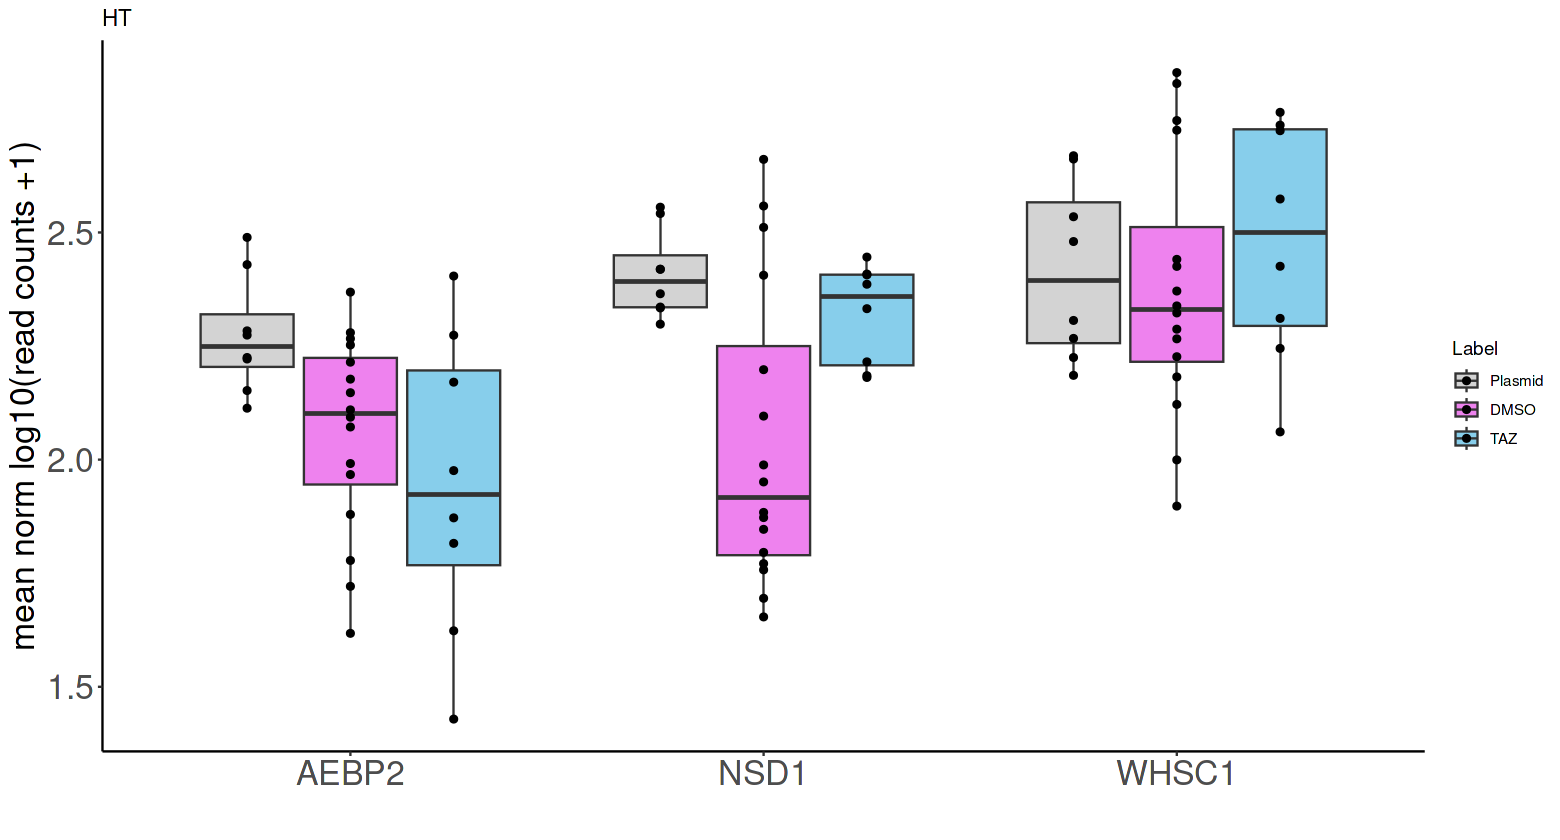

In [95]:
library(tidyr)
library(dplyr)
library(ggplot2)

options(repr.plot.width=13, repr.plot.height=7)

WT_DMSO_Plasmid_counts = read.table("/home/darragh/New/DAN_CRISPR_Screen/boxplots/HT/DMSOvsTAZ_mageckCounts.count_normalized.txt", sep = "\t", header=T)
WSU_DMSO_TAZ = WT_DMSO_Plasmid_counts[(WT_DMSO_Plasmid_counts$Gene == "AEBP2") | (WT_DMSO_Plasmid_counts$Gene == "NSD1") | (WT_DMSO_Plasmid_counts$Gene == "WHSC1")  , ]


WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  pivot_longer(cols = c(DMSO_1, DMSO_2, TAZ_1, TAZ_2),
               names_to = "Label",
               values_to = "Value") %>%
  select(sgRNA, Gene, Value, Label)



WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "DMSO_1", "DMSO", Label))

WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "DMSO_2", "DMSO", Label))

WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "TAZ_1", "TAZ", Label))

WSU_DMSO_TAZ <- WSU_DMSO_TAZ %>%
  mutate(Label = ifelse(Label == "TAZ_2", "TAZ", Label))


WSU_DMSO_Plasmid_TAZ = rbind(WSU_DMSO_Plasmid, WSU_DMSO_TAZ )


# EZH2 <- EZH2 %>%
#   mutate(Label = ifelse(Label == "TAZ_1", "TAZ", Label))

# EZH2 <- EZH2 %>%
#   mutate(Label = ifelse(Label == "TAZ_2", "TAZ", Label))

WSU_DMSO_Plasmid_TAZ$Label <- factor(WSU_DMSO_Plasmid_TAZ$Label, levels = c("Plasmid", "DMSO", "TAZ"))

WSU_DMSO_Plasmid_TAZ$Value = WSU_DMSO_Plasmid_TAZ$Value+1


ggplot(WSU_DMSO_Plasmid_TAZ, aes(x = Gene, y = log10(Value), fill = Label)) +
    geom_boxplot() +
    geom_jitter(position = position_dodge(width = 0.75), size = 1.5
    ) +
  theme_classic() + 
  ylab("mean norm log10(read counts +1)") +
  xlab("") +
  ggtitle("HT") +
  theme(axis.text = element_text(size = 20), axis.title = element_text(size = 20), panel.grid.major = element_blank(),
  panel.grid.minor = element_blank() ) +
  scale_fill_manual(values = c("#D3D3D3", "violet", "skyblue")) 
  ggsave("/home/darragh/New/HT_Dan_CRISPR_screen.pdf", width=13, height=7)


head(WSU_DMSO_Plasmid_TAZ)

In [96]:


library(dplyr)

# Perform Wilcoxon rank sum tests for each unique Gene
unique_genes <- unique(WSU_DMSO_Plasmid_TAZ$Gene)

for (gene in unique_genes) {
  cat("Gene:", gene, "\n")
  
  # Subset data for the current gene
  gene_data <- WSU_DMSO_Plasmid_TAZ %>% filter(Gene == gene)
  
  # Perform Wilcoxon rank sum tests
  wilcox_dmsotaz <- t.test(Value ~ Label, data = gene_data %>%
                                  filter(Label %in% c("DMSO", "TAZ")))
  wilcox_dmsoplas <- t.test(Value ~ Label, data = gene_data %>%
                                   filter(Label %in% c("DMSO", "Plasmid")))
  wilcox_plasmdms <- t.test(Value ~ Label, data = gene_data %>%
                                   filter(Label %in% c("Plasmid", "TAZ")))
  
  # Print p-values
  cat("DMSO & TAZ p-value:", wilcox_dmsotaz$p.value, "\n")
  cat("DMSO & Plasmid p-value:", wilcox_dmsoplas$p.value, "\n")
  cat("Plasmid & DMSO p-value:", wilcox_plasmdms$p.value, "\n")

}



Gene: AEBP2 
DMSO & TAZ p-value: 0.6274536 
DMSO & Plasmid p-value: 0.02088332 
Plasmid & DMSO p-value: 0.03364172 
Gene: NSD1 
DMSO & TAZ p-value: 0.08529174 
DMSO & Plasmid p-value: 0.007593254 
Plasmid & DMSO p-value: 0.117104 
Gene: WHSC1 
DMSO & TAZ p-value: 0.5087106 
DMSO & Plasmid p-value: 0.9056163 
Plasmid & DMSO p-value: 0.4332693 


In [ ]:
!mageck mle -k mageckResults/PlasmidVsDMSO_mageckCounts.count.txt  -d designMatrix_1.txt  -n mageckResults/PlasmidVsDMSO_mle

In [ ]:
!mageck mle -k mageckResults/DMSOvsPlasmid_mageckCounts.count.txt  -d designMatrix_2.txt  -n mageckResults/DMSOVsPlasmid_mle

# Make plots for illustrative examples

In [ ]:
!mageck count -l brunelloLibraryRef.csv  -n mageckResults/PlasmidvsDMSO_mageckCounts --sample-label DMSO_1,DMSO_2,Plasmid_1,Plasmid_2 --fastq clean/HT_DMSOrep1.fastq clean/HT_DMSOrep2.fastq clean/Gerry_Brunello_pDNA_R1.fastq clean/Gerry_Brunello_pDNA_R2.fastq --trim-5 0 --control-sgrna nonTargettingControlIds.txt

In [ ]:
!mageck count -l brunelloLibraryRef.csv  -n mageckResults/PlasmidvsDMSO_mageckCounts --sample-label DMSO_1,DMSO_2,Plasmid_1,Plasmid_2 --fastq clean/HT_DMSOrep1.fastq clean/HT_DMSOrep2.fastq clean/Gerry_Brunello_pDNA_R1.fastq clean/Gerry_Brunello_pDNA_R2.fastq --trim-5 0 --control-sgrna nonTargettingControlIds.txt

In [ ]:
!mageck mle -k mageckResults/PlasmidvsDMSO_mageckCounts.count.txt  -d designMatrix_2.txt  -n mageckResults/PlasmidvsDMSO_mle_HT

In [ ]:
##Create matrix
#Samples        baseline        Taz
#DMSO_1   1               0
#DMSO_2   1               0
#Taz_1     1               1
#Taz_2     1               1

In [8]:
BiocManager::install("MAGeCKFlute")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org



Bioconductor version 3.15 (BiocManager 1.30.20), R 4.2.0 (2022-04-22)

Installing package(s) 'MAGeCKFlute'

also installing the dependency ‘clusterProfiler’


Warning message in install.packages(...):
“installation of package ‘clusterProfiler’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘MAGeCKFlute’ had non-zero exit status”
Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    boot, class, cluster, codetools, foreign, KernSmooth, lattice, mgcv, nnet,
    rpart
  path: /usr/lib/R/site-library
  packages:
    littler
  path: /usr/local/lib/R/site-library
  packages:
    acepack, ade4, affy, affyio, amap, annotate, AnnotationDbi,
    AnnotationFilter, askpass, backports, batchtools, bdsmatrix, BH, Biobase,
    BiocFileCache, BiocGenerics, BiocIO, BiocParallel, BiocVersion, Biostrings,
    bit, blob, brew, brio, BSgenome, BSgenome.Hsapiens.UCSC.hg38, cachem,
    callr, carData, circlize, cli

In [9]:
# Read and visualize the file format

library(MAGeCKFlute)
library(ggplot2)

gdata = read.delim("/home/darragh/New/DAN_CRISPR_Screen/mageckResults/DMSOVspDNA_m.gene_summary.txt")
sdata = read.delim("/home/darragh/New/DAN_CRISPR_Screen/mageckResults/DMSOVspDNA_m.sgrna_summary.txt")

head(gdata)
head(sdata)

FluteRRA(gdata, sdata, proj="daire", organism="hsa", scale_cutoff = 1, outdir = "./",  omitEssential = TRUE)

ERROR: Error in library(MAGeCKFlute): there is no package called ‘MAGeCKFlute’


# TAZ DMSO

In [10]:
import pandas as pd

gene_mle = pd.read_table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazVspDNA_mle.gene_summary.txt")
gene_counts = pd.read_table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazVspDNA_mageckCounts.count_normalized.txt")
gene_counts['pDNA'] = (gene_counts['pDNA_1'] + gene_counts['pDNA_2'])/2
gene_counts['Taz'] = (gene_counts['Taz_1'] + gene_counts['Taz_2'])/2
gene_counts_mle = gene_counts.merge(gene_mle, on="Gene")
gene_counts_mle = gene_counts_mle[['Gene',	'Taz',	'pDNA', 'Taz|p-value',	'Taz|fdr']] 
gene_counts_mle.to_csv("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazpDNA_normalized_counts_mle.txt", sep = "\t", header=True, index=False)

gene_mle = pd.read_table("/home/darragh/New/DAN_CRISPR_Screen/mageckResults_2/DMSOVsPlasmid_mle.gene_summary.txt")
gene_counts = pd.read_table("/home/darragh/New/DAN_CRISPR_Screen/mageckResults_2/DMSOvsPlasmid_mageckCounts.count_normalized.txt")
gene_counts['pDNA'] = (gene_counts['Plasmid_1'] + gene_counts['Plasmid_2'])/2
gene_counts['DMSO'] = (gene_counts['DMSO_1'] + gene_counts['DMSO_2'])/2
gene_counts_mle = gene_counts.merge(gene_mle, on="Gene")
gene_counts_mle = gene_counts_mle[['Gene',	'DMSO',	'pDNA', 'plasmid|p-value',	'plasmid|fdr']] 
gene_counts_mle.to_csv("/home/darragh/New/DAN_CRISPR_Screen/WSU/DMSOpDNA_normalized_counts_mle.txt", sep = "\t", header=True, index=False)


In [14]:
import pandas as pd

file = pd.read_table("/home/darragh//Hartwig/metadata.tsv", sep = "\t")

file = file.loc[file['primaryTumorLocation'] == "Breast"]
file = file.loc[file['biopsySite'] == "Brain"]

display(file)





,patientId,sampleId,setName,tumorPurity,hmfPatientId,hmfSampleId,primaryTumorLocation,primaryTumorSubLocation,primaryTumorType,primaryTumorSubType,...,hasSystemicPreTreatment,hasRadiotherapyPreTreatment,treatmentGiven,treatmentStartDate,treatmentEndDate,treatment,treatmentType,responseDate,responseMeasured,firstResponse
1530,CPCT02010326,CPCT02010326TII,170423_HMFregCPCT_FR10302039_FR14064597_CPCT02...,0.78,HMF002035,HMF002035A,Breast,NaN,Carcinoma,Triple negative,...,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd

gene_mle = pd.read_table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazVsDMSO_mle.gene_summary.txt")
gene_mle.loc[gene_mle['Gene'] == "AEBP2"]


,Gene,sgRNA,Taz|beta,Taz|z,Taz|p-value,Taz|fdr,Taz|wald-p-value,Taz|wald-fdr
18715,AEBP2,4,-0.63096,-1.6909,0.001425,0.097826,0.090862,0.81144



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Gene,average_taz_FC,average_dmso_FC
,<chr>,<dbl>,<dbl>
1,A1BG,-0.42471846,-0.31068060
2,A1CF,0.28404174,0.16226047
3,A2M,0.07601573,0.03445976
4,A2ML1,-0.02496460,0.05415248
5,A3GALT2,0.50800866,0.36978604
6,A4GALT,0.32663040,-0.21769452


,Gene,average_taz_FC,average_dmso_FC
,<chr>,<dbl>,<dbl>
392,AEBP2,-2.79448,-1.599014


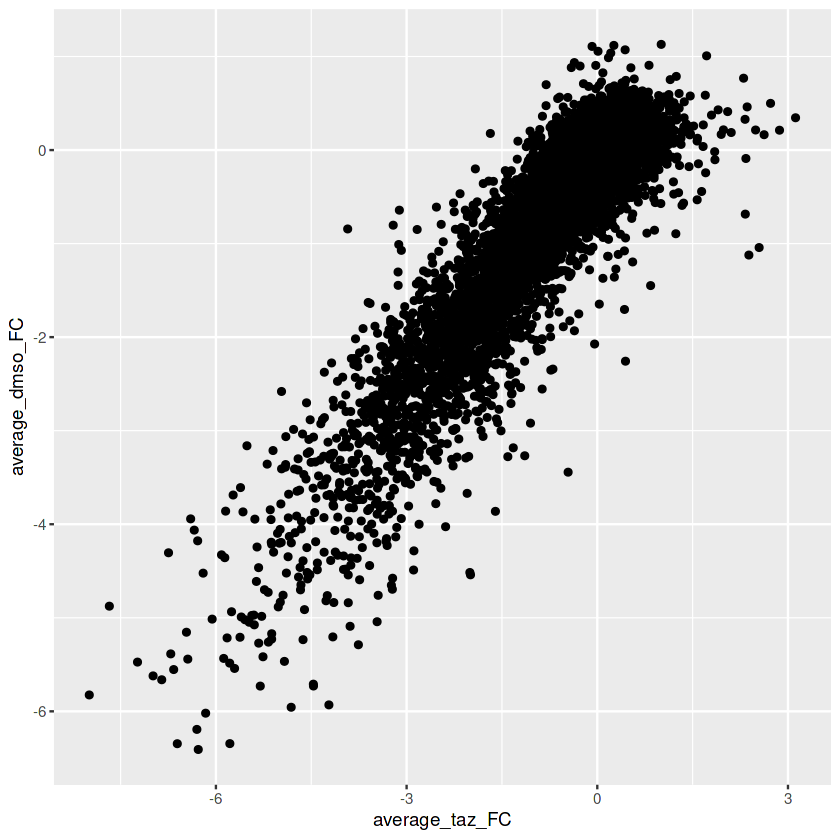

In [5]:
library(ggplot2)
library(dplyr)

taz = read.table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazpDNA_normalized_counts_mle.txt", header=T)

dmso = read.table("/home/darragh/New/DAN_CRISPR_Screen/WSU/DMSOpDNA_normalized_counts_mle.txt", header=T)

taz$taz_FC = log2((taz$Taz+1) / (taz$pDNA+1))
dmso$dmso_FC = log2((dmso$DMSO+1) / (dmso$pDNA+1))

taz = taz[,c("Gene", "taz_FC")]
dmso = dmso[,c("Gene", "dmso_FC")]

taz <- taz %>%
  group_by(Gene) %>%
  summarise(average_taz_FC = mean(taz_FC))

dmso <- dmso %>%
  group_by(Gene) %>%
  summarise(average_dmso_FC = mean(dmso_FC))

taz_dmso = merge(taz, dmso, by="Gene")

head(taz_dmso)


# head(file)

ggplot(taz_dmso, aes(x=average_taz_FC, y=average_dmso_FC)) +
geom_point()

taz_dmso[taz_dmso$Gene == "AEBP2",]



In [21]:
taz_dmso[taz_dmso$Gene == "SMARCA5",]



,Gene,average_taz_FC,average_dmso_FC
,<chr>,<dbl>,<dbl>
15114,SMARCA5,-2.559828,-1.313375


In [14]:
taz = read.table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazVspDNA_mle.gene_summary.txt", header=T)
taz[taz$Gene == "EP300",]



,Gene,sgRNA,Taz.beta,Taz.z,Taz.p.value,Taz.fdr,Taz.wald.p.value,Taz.wald.fdr
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3228,EP300,4,-1.9301,-6.1622,0,0,7.1756e-10,1.0706e-07


In [7]:
taz = read.table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazpDNA_normalized_counts_mle.txt", header=T)
colnames(taz) = c("gene", "taz", "pDNA", "taz_p_value", "taz_q_value")

taz_signif = taz[taz$taz_q_value < 0.25,]

taz_genes = as.data.frame(unique(taz$gene))
write.table(taz_genes, "/home/darragh/CRISPR_screen_taz_genes.txt", sep="\t", row.names=F, quote=F)

taz_signif_gene = as.data.frame(c(unique((taz_signif$gene), taz_q_value)))


write.table(taz_signif_gene, "/home/darragh/CRISPR_screen_taz_signif_genes.txt", sep="\t", row.names=F, quote=F)


head(taz_signif_gene)


# glist = taz_signif_gene.squeeze().str.strip().to_list()

# get background gene set

# glist_bg = taz$gene.squeeze().str.strip().to_list()

# # backgound only reconigized a gene list input.
# enr_bg = gp.enrichr(gene_list=glist,
#                  gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
#                  #organism='human', # organism argment is ignored because user input a background
#                  background=glist_bg,
#                  outdir=None, # don't write to disk
#                 )

# enr_bg.results.to_csv("/home/darragh/New/GSEA/MDAMB231_bg_enr_bg.txt", sep="\t", header=True, index=False) 
# enr_bg = pd.read_table("/home/darragh/New/GSEA/MDAMB231_bg_enr_bg.txt", sep="\t")

# display(enr_bg)


ERROR: Error in unique.default((taz_signif$gene), taz_q_value): object 'taz_q_value' not found


In [25]:

import pandas as pd
import numpy as np
import gseapy as gp

taz = pd.read_table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazVspDNA_mle.gene_summary.txt")
taz = taz.loc[taz['Taz|fdr'] < 0.1]

non_essential = pd.read_table("/home/darragh/CRISPR_non_essential.txt", header=None)
non_essential.columns = ['gene']

taz = taz.loc[taz['Gene'].isin(non_essential['gene'])]
taz = taz.sort_values(by='Taz|beta')

taz = taz[['Gene']]


# pre_res = gp.prerank(rnk=taz, # or rnk = rnk,
#                      gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
#                      threads=4,
#                      min_size=5,
#                      max_size=1000,
#                      permutation_num=1000, # reduce number to speed up testing
#                      outdir=None, # don't write to disk
#                      seed=6,
#                      verbose=True, # see what's going on behind the scenes
#                     )

# pre_res.res2d.head(10)

taz.to_csv("/home/darragh/CRISPR_DAN_TAZ_NON_ESSENTIAL.txt", index=False, sep = "\t")



Saving 6.67 x 6.67 in image


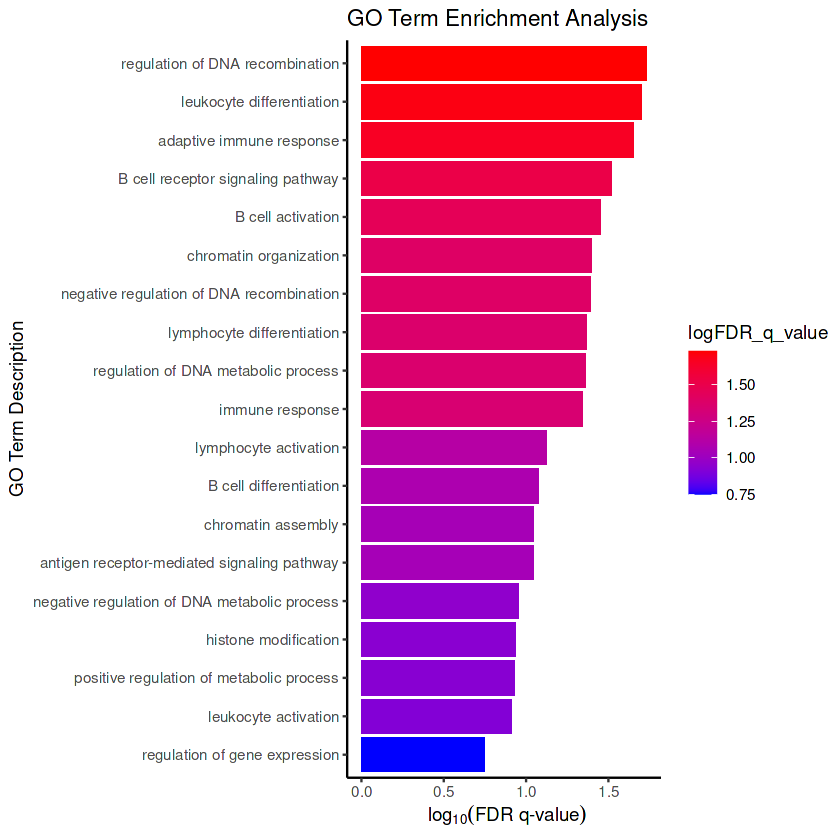

In [4]:
# Load necessary libraries
library(ggplot2)

# Create the data frame
df <- data.frame(
  GO_Term = c("GO:0000018", "GO:0002250", "GO:0025221", "GO:0042113", "GO:0050853", 
              "GO:0045910", "GO:0006325", "GO:0051052", "GO:0030098", "GO:0006955", 
              "GO:0046649", "GO:0031497", "GO:0050851", "GO:0030183", "GO:0009893", 
              "GO:0045321", "GO:0016570", "GO:0051053", "GO:0010468"),
  Description = c("regulation of DNA recombination", "adaptive immune response", 
                  "leukocyte differentiation", "B cell activation", "B cell receptor signaling pathway", 
                  "negative regulation of DNA recombination", "chromatin organization", 
                  "regulation of DNA metabolic process", "lymphocyte differentiation", "immune response", 
                  "lymphocyte activation", "chromatin assembly", 
                  "antigen receptor-mediated signaling pathway", "B cell differentiation", 
                  "positive regulation of metabolic process", "leukocyte activation", 
                  "histone modification", "negative regulation of DNA metabolic process", 
                  "regulation of gene expression"),
  P_value = c(4.22e-6, 1.02e-5, 1.36e-5, 3.21e-5, 3.46e-5, 
              5.54e-5, 6.41e-5, 7.97e-5, 8.8e-5, 1.04e-4, 
              1.89e-4, 2.47e-4, 2.68e-4, 2.68e-4, 4.06e-4, 
              4.45e-4, 4.54e-4, 4.56e-4, 7.78e-4),
  FDR_q_value = c(1.85e-2, 2.22e-2, 1.98e-2, 3.51e-2, 3.03e-2, 
                  4.04e-2, 4.01e-2, 4.37e-2, 4.28e-2, 4.54e-2, 
                  7.54e-2, 9.03e-2, 9.04e-2, 8.39e-2, 1.18e-1, 
                  1.22e-1, 1.16e-1, 1.11e-1, 1.79e-1)
)

# Calculate -log10(FDR q-value)
df$logFDR_q_value <- -log10(df$FDR_q_value)

# Plot with ggplot2
ggplot(df, aes(x = reorder(Description, logFDR_q_value), y = logFDR_q_value, fill = logFDR_q_value)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "GO Term Enrichment Analysis",
       x = "GO Term Description",
       y = expression(-log[10]("FDR q-value"))) +
  theme_classic()
ggsave("/home/darragh/gene_ontology_crispr_plot.pdf")


In [29]:

import pandas as pd
import gseapy as gp

taz = pd.read_table("/home/darragh/Crispr_screen_da_taz_genes.txt")

glist = taz['Gene'].squeeze().str.strip().to_list()

# glist_bg = taz['gene'].squeeze().str.strip().to_list()

# # backgound only reconigized a gene list input.
enr_bg = gp.enrichr(gene_list=glist,
                 gene_sets=['KEGG_2021_Human'],
                 organism='human', # organism argment is ignored because user input a background
                 #background=glist_bg,
                 outdir=None, # don't write to disk
                )

enr_bg.results.to_csv("/home/darragh/New/GSEA/Dan_Taz_CRISPR_bg_enr_bg.txt", sep="\t", header=True, index=False) 
enr_bg = pd.read_table("/home/darragh/New/GSEA/Dan_Taz_CRISPR_bg_enr_bg.txt", sep="\t")

enr_bg_sifnif = enr_bg.loc[enr_bg['Adjusted P-value'] < 0.25]

display(enr_bg_sifnif)


2024-09-04 10:44:29,856 [WARNING] Input library not found: GOBP_CHROMATIN_REMODELING. Skip


Exception: No GeneSets are valid !!! Check your gene_sets input.

In [28]:
enr_bg_sifnif.tail(6)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
60,KEGG_2021_Human,Central carbon metabolism in cancer,11/70,0.021938,0.099260,0,0,2.162335,8.259128,SLC7A5;G6PD;PKM;SCO2;AKT2;MYC;PGAM1;SLC2A1;PIK...
61,KEGG_2021_Human,Rheumatoid arthritis,13/93,0.032652,0.145356,0,0,1.884897,6.449812,ATP6V1A;ATP6V0B;ATP6V1G1;ATP6AP1;ITGB2;FOS;ICA...
62,KEGG_2021_Human,Glutathione metabolism,9/57,0.035226,0.154323,0,0,2.173177,7.271393,G6PD;RRM1;GCLC;RRM2;GPX4;GSS;ODC1;PGD;SRM
63,KEGG_2021_Human,Cardiac muscle contraction,12/87,0.042701,0.184149,0,0,1.855231,5.850525,COX7B;UQCRB;COX4I1;UQCRC1;ATP2A2;UQCRFS1;ATP1B...
64,KEGG_2021_Human,Fatty acid biosynthesis,4/18,0.049832,0.211595,0,0,3.307201,9.918614,MECR;ACSL4;MCAT;ACACA
65,KEGG_2021_Human,Ubiquinone and other terpenoid-quinone biosynt...,3/11,0.051284,0.214459,0,0,4.339387,12.889648,COQ3;COQ2;COQ6


In [37]:
file = pd.read_table("/home/darragh/New/DAN_CRISPR_Screen/WSU/TazVspDNA_mle.gene_summary.txt")
file = file.loc[file['Taz|fdr'] < 0.1]
file = file.sort_values(by='Taz|beta')
file = file[['Gene']]
file.to_csv("/home/darragh/CRISPR_DAN_Taz_beta.txt", sep="\t", header=True, index=False) 


file

,Gene
13066,RPL8
18472,PRPF8
4587,GAPDH
1090,DNA2
1933,POLR2L
...,...
11182,ELAVL1
18612,ZBTB10
4972,ZFP36L2
8631,KCTD5


# Achilles gene effect


In [4]:
import pandas as pd

achilles = pd.read_table("/home/darragh/CRISPR_NHL_PRC2.txt", sep = ",")
#achilles = pd.concat([achilles.iloc[:, [0]], achilles.filter(regex='HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', axis=1)], axis=1)

#achilles = achilles[[]]
#display(achilles)

# achilles.columns = ['gene', 'KARPAS299', 'KIJK', 'PF382', 'SUPM2', 'SUPT1' ]

# achilles = achilles.loc[(achilles['gene'] == "EZH2") | (achilles['gene'] == "EED") | (achilles['gene'] == "SUZ12") |
#                         (achilles['gene'] == "EZH1") | (achilles['gene'] == "PHF1") | (achilles['gene'] == "MTF2") |
#                         (achilles['gene'] == "PHF19") | (achilles['gene'] == "LCOR") | (achilles['gene'] == "LCORL") |
#                         (achilles['gene'] == "AEBP2") | (achilles['gene'] == "JARID2") , ]


# achilles = pd.melt(achilles, id_vars=['gene'], var_name='sample', value_name='value')
# achilles.to_csv("/home/darragh/achilles_lymphoma_cells_plot.txt", sep="\t", index=False)
# achilles.head(60)


,Unnamed: 0,KARPAS299_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,KIJK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,MOLM13_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,MV411_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NB4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NOMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,P31FUJ_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,PF382_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SUPM2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SUPT1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TF1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
0,A1BG,0.151919,-0.014550,0.139325,-0.011871,0.057885,0.092022,0.021745,-0.081341,0.087328,-0.037541,0.030342,0.058641,0.061776
1,A1CF,0.082257,0.037640,0.117566,0.190795,-0.154905,0.104811,0.046745,0.120464,0.000441,0.151514,0.047233,0.084236,0.044977
2,A2M,-0.043931,-0.027945,-0.019792,0.005568,-0.151108,0.073537,-0.053020,0.009304,-0.022455,-0.031786,-0.157991,-0.093803,-0.075126
3,A2ML1,0.110374,0.262660,0.156492,0.162100,0.035391,0.299699,0.066575,0.190711,0.128588,0.167483,0.137583,0.191558,0.147213
4,A3GALT2,-0.103935,0.060571,-0.042927,0.083874,-0.161642,-0.074327,0.006640,0.031336,-0.045402,0.022214,-0.065800,-0.016023,-0.097554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,ZYG11A,0.065423,0.099902,0.122309,0.063786,0.128046,0.074774,0.116517,0.009376,0.100266,-0.001199,0.024383,-0.013545,0.049866
17666,ZYG11B,-0.061151,0.038188,-0.140665,-0.098903,-0.256051,-0.210502,-0.058604,-0.061026,-0.107890,-0.095707,-0.108723,0.004810,-0.117562
17667,ZYX,0.024890,0.027359,0.190340,0.126102,0.283143,0.151094,0.090377,0.114305,0.092989,0.106509,0.199740,0.101791,0.065041
17668,ZZEF1,-0.065269,-0.058442,-0.154439,-0.193253,-0.197498,-0.309350,0.009933,-0.066186,-0.133993,-0.006535,-0.258996,-0.020814,-0.132266


Saving 6.67 x 6.67 in image


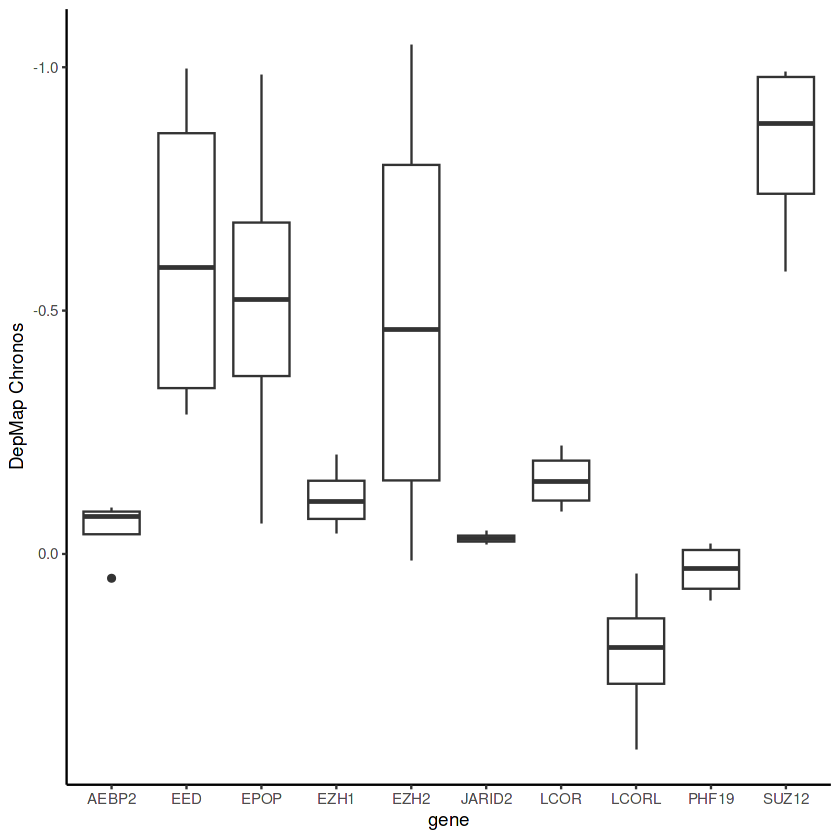

In [8]:
library(ggplot2)


file = read.table("/home/darragh/CRISPR_NHL_PRC2", header=F)
colnames(file) =c("gene", "chronos")

ggplot(file, aes(x=gene, y=chronos)) +
geom_boxplot() +
scale_y_reverse() +
theme_classic() +
ylab("DepMap Chronos")
ggsave("/home/darragh/CRISPR_NHL_PRC2.pdf")